### Objective:
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months. 
* Context: Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities. 

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-ssetty3.git


In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import itertools
from scipy.stats import norm 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd. read_csv ('bank.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [5]:
# check missing values
print ('The missing values are >>> \n', df.isnull().sum())

The missing values are >>> 
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
# pandas_profiling 
from pandas_profiling import ProfileReport

In [7]:
profile = ProfileReport(df, title=" Bank Customer Pandas Profiling Report")
profile.to_file("Bank Customer Pandas Profiling Report.html")

In [8]:
profile

In [6]:
# Drop the columns as explored above, have no corelation seems dumb data
df1 = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [7]:
df1.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

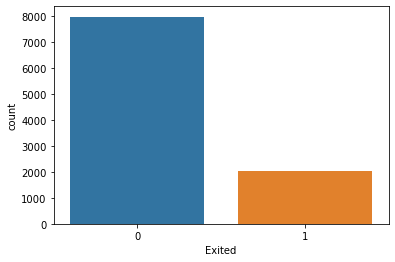

In [8]:
#To Understand the customer base and total opportunity with given data.
sns.countplot(df1['Exited'])

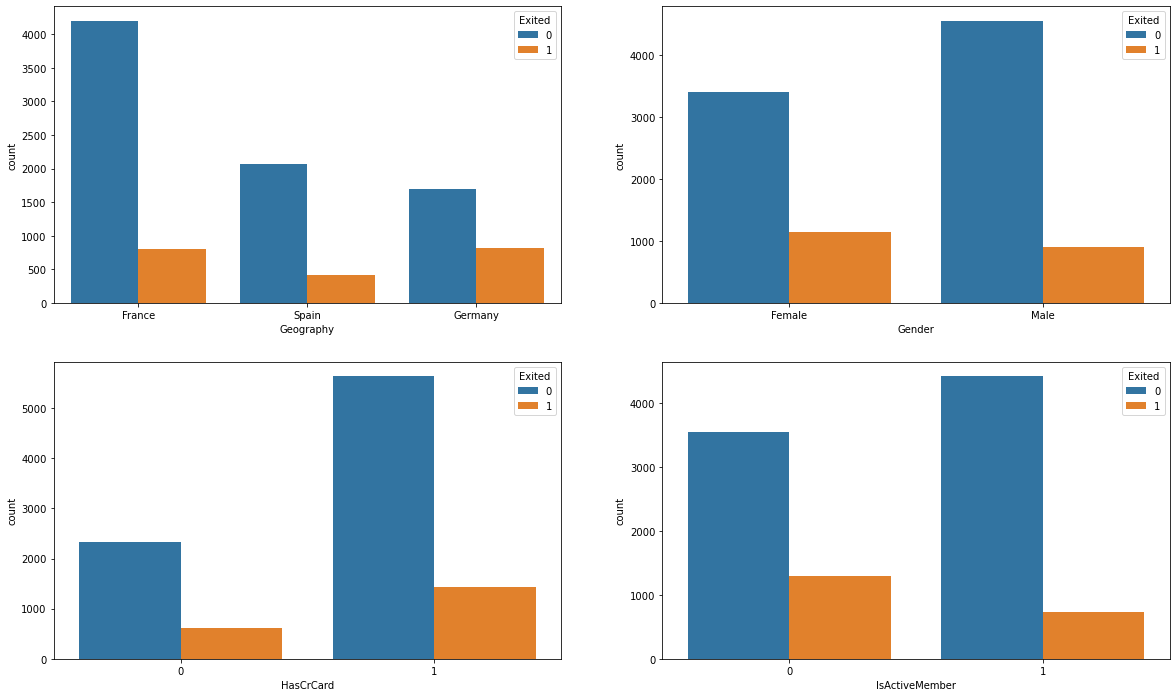

In [10]:
    # We first review the 'Status' relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = df1, ax=axarr[0][0])
    sns.countplot(x='Gender', hue = 'Exited',data = df1, ax=axarr[0][1])
    sns.countplot(x='HasCrCard', hue = 'Exited',data = df1, ax=axarr[1][0])
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = df1, ax=axarr[1][1])

Observation: 
The proportion of female customers Leaving is greater than that of male customers
With respect to geography,most of the people are from France and Spain. 
majority of the customers thatLeaving are those with credit cards and the inactive members have a greater churn. 

In [11]:
#include relevant columns within x and y
x = df [['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
        'EstimatedSalary']]
y = df[['Exited']]

In [12]:
x.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

In [13]:
y.head()

Exited
0       1
1       0
2       1
3       0
4       0

In [14]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Exited  10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [15]:
# Geography  10000  object &  Gender 10000   object 
# deal with Object data --> encode them

from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
x.iloc[:, 1] = labelencoder_x.fit_transform(x.iloc[:, 1]) #applying on Geography

In [16]:
labelencoder_x_2 = LabelEncoder()
x.iloc[:, 2] = labelencoder_x_2.fit_transform(x.iloc[:, 2]) #applying on Gender

In [17]:
x.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10

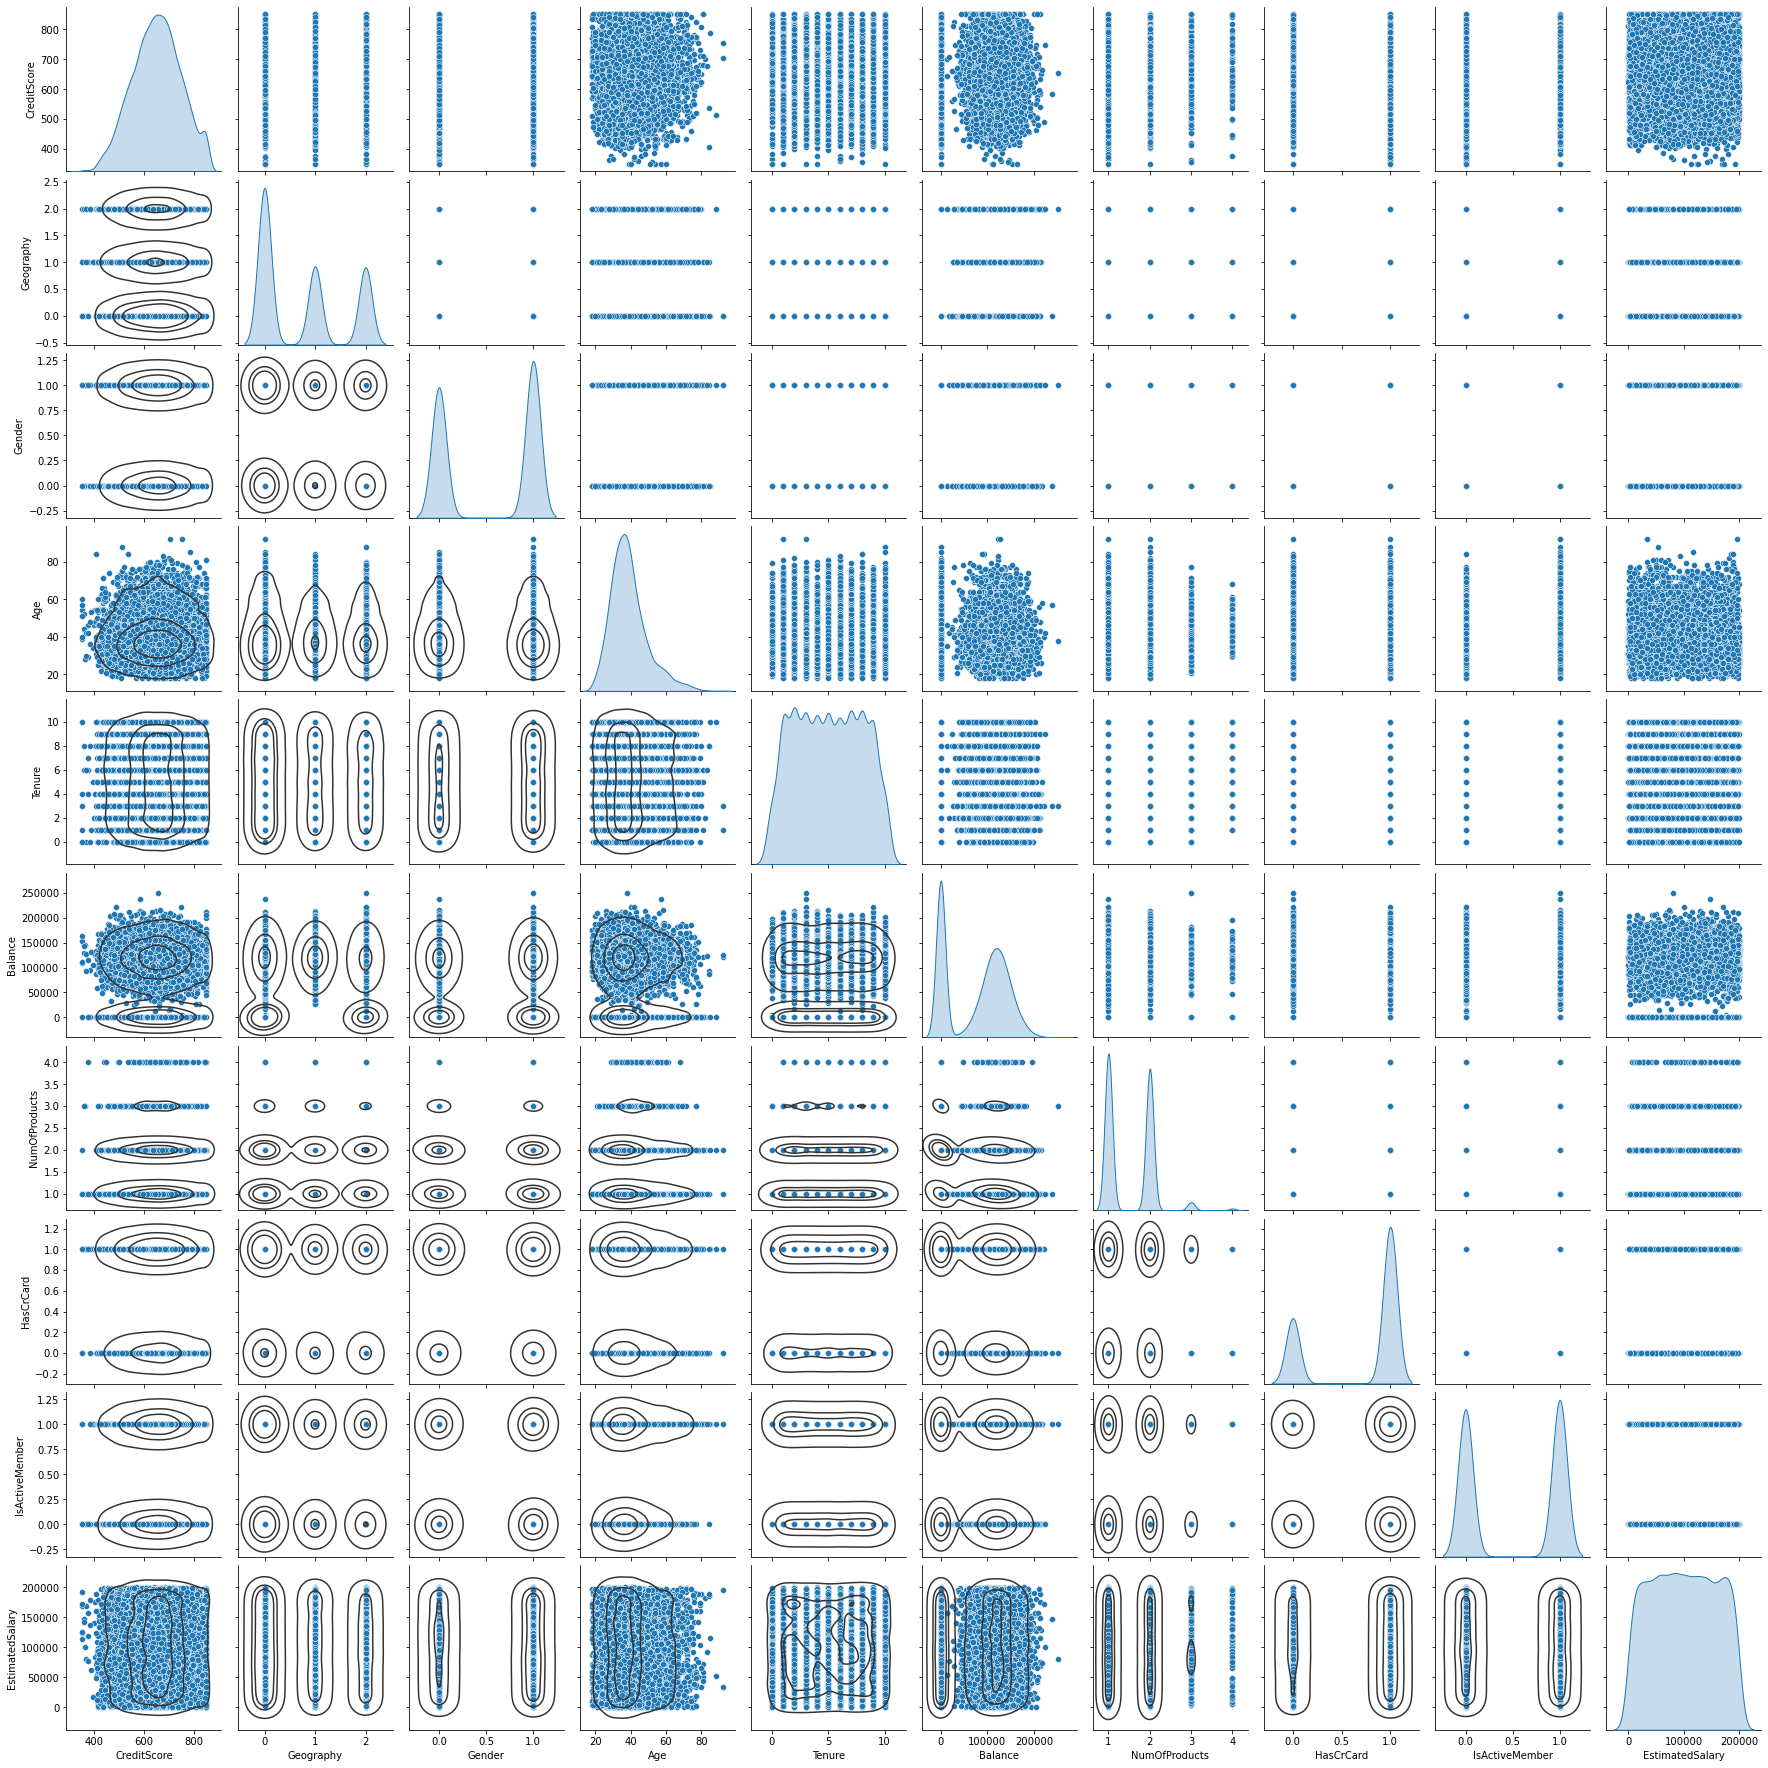

In [20]:
g=sns.pairplot(x,diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")

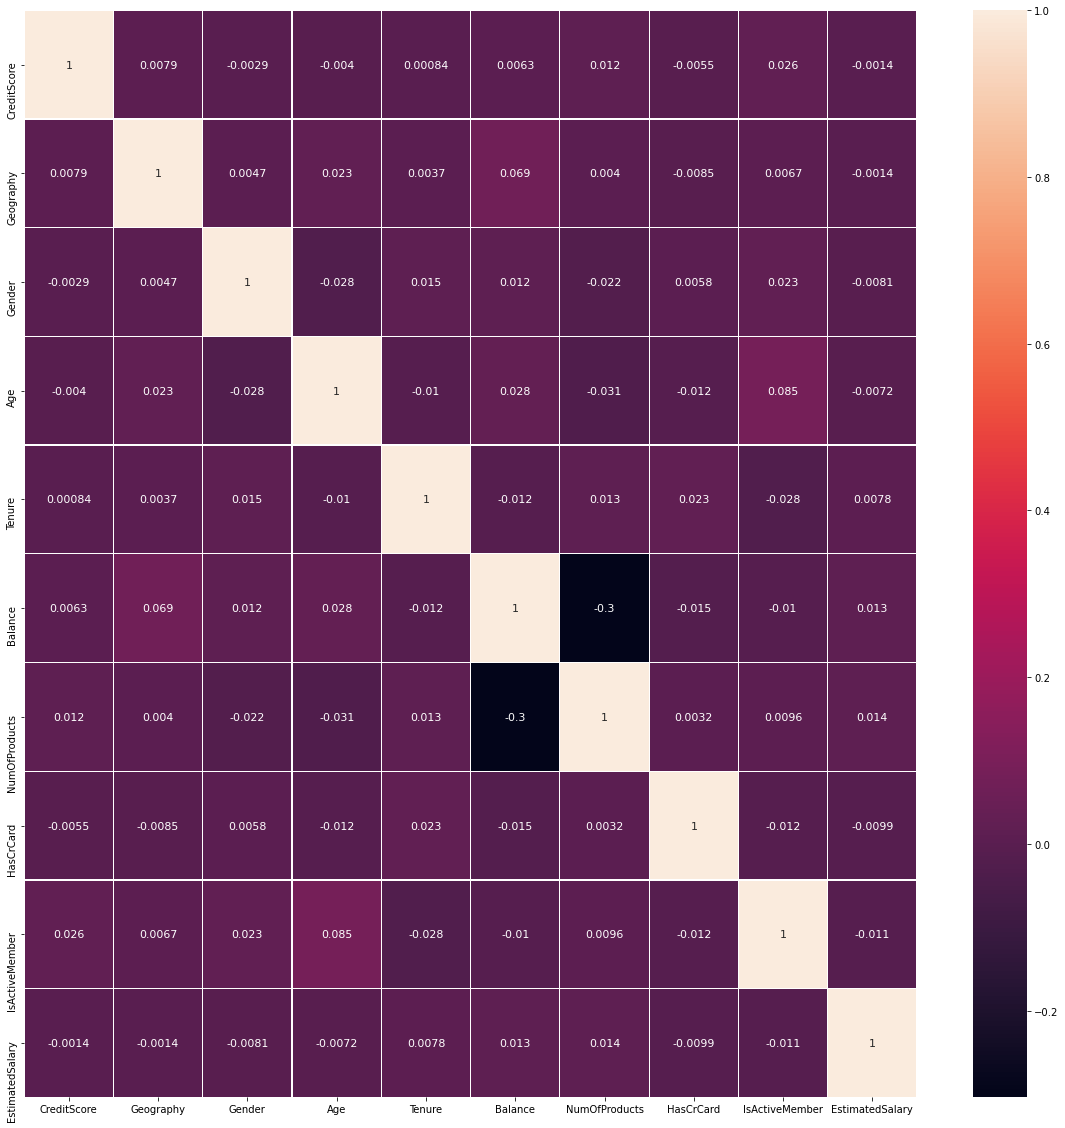

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(x.corr(), annot=True,linewidths=0.2,annot_kws={'size':11})

In [19]:
# Slplit data test and Train
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [20]:
scaler = preprocessing.MinMaxScaler()
# MinMaxScalar has been used here. 
#fitting the transform on test and train separately
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout #to add layers

In [26]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

In [27]:
# Adding the second hidden layer
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1))

In [28]:
# Adding the output layer
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [29]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 66        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_1 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


In [34]:
#compile the model --> backpropagation -> gradient descent
classifier.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

In [35]:
# fitting the NN to training set.
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200
225/225 - 1s - loss: 0.5502 - accuracy: 0.7568 - val_loss: 0.5257 - val_accuracy: 0.7788
Epoch 2/200
225/225 - 0s - loss: 0.5075 - accuracy: 0.7962 - val_loss: 0.5174 - val_accuracy: 0.7788
Epoch 3/200
225/225 - 0s - loss: 0.4961 - accuracy: 0.7983 - val_loss: 0.5117 - val_accuracy: 0.7788
Epoch 4/200
225/225 - 0s - loss: 0.4912 - accuracy: 0.7993 - val_loss: 0.5087 - val_accuracy: 0.7788
Epoch 5/200
225/225 - 0s - loss: 0.4868 - accuracy: 0.7993 - val_loss: 0.5031 - val_accuracy: 0.7788
Epoch 6/200
225/225 - 0s - loss: 0.4808 - accuracy: 0.7993 - val_loss: 0.4997 - val_accuracy: 0.7788
Epoch 7/200
225/225 - 0s - loss: 0.4771 - accuracy: 0.7993 - val_loss: 0.4952 - val_accuracy: 0.7788
Epoch 8/200
225/225 - 0s - loss: 0.4728 - accuracy: 0.7993 - val_loss: 0.4922 - val_accuracy: 0.7788
Epoch 9/200
225/225 - 0s - loss: 0.4690 - accuracy: 0.7997 - val_loss: 0.4882 - val_accuracy: 0.7812
Epoch 10/200
225/225 - 0s - loss: 0.4632 - accuracy: 0.8039 - val_loss: 0.4861 - val_accura

Epoch 82/200
225/225 - 0s - loss: 0.4079 - accuracy: 0.8365 - val_loss: 0.4568 - val_accuracy: 0.8050
Epoch 83/200
225/225 - 0s - loss: 0.4084 - accuracy: 0.8369 - val_loss: 0.4504 - val_accuracy: 0.8087
Epoch 84/200
225/225 - 0s - loss: 0.4104 - accuracy: 0.8336 - val_loss: 0.4576 - val_accuracy: 0.8075
Epoch 85/200
225/225 - 0s - loss: 0.4066 - accuracy: 0.8378 - val_loss: 0.4549 - val_accuracy: 0.8100
Epoch 86/200
225/225 - 0s - loss: 0.4098 - accuracy: 0.8353 - val_loss: 0.4548 - val_accuracy: 0.8112
Epoch 87/200
225/225 - 0s - loss: 0.4062 - accuracy: 0.8360 - val_loss: 0.4508 - val_accuracy: 0.8100
Epoch 88/200
225/225 - 0s - loss: 0.4057 - accuracy: 0.8386 - val_loss: 0.4519 - val_accuracy: 0.8112
Epoch 89/200
225/225 - 0s - loss: 0.4067 - accuracy: 0.8367 - val_loss: 0.4482 - val_accuracy: 0.8125
Epoch 90/200
225/225 - 0s - loss: 0.4085 - accuracy: 0.8354 - val_loss: 0.4518 - val_accuracy: 0.8112
Epoch 91/200
225/225 - 0s - loss: 0.4045 - accuracy: 0.8407 - val_loss: 0.4592 - v

Epoch 162/200
225/225 - 0s - loss: 0.3925 - accuracy: 0.8426 - val_loss: 0.4360 - val_accuracy: 0.8263
Epoch 163/200
225/225 - 0s - loss: 0.3936 - accuracy: 0.8418 - val_loss: 0.4322 - val_accuracy: 0.8263
Epoch 164/200
225/225 - 0s - loss: 0.3932 - accuracy: 0.8431 - val_loss: 0.4373 - val_accuracy: 0.8225
Epoch 165/200
225/225 - 0s - loss: 0.3937 - accuracy: 0.8425 - val_loss: 0.4349 - val_accuracy: 0.8275
Epoch 166/200
225/225 - 0s - loss: 0.3880 - accuracy: 0.8474 - val_loss: 0.4365 - val_accuracy: 0.8238
Epoch 167/200
225/225 - 0s - loss: 0.3930 - accuracy: 0.8400 - val_loss: 0.4379 - val_accuracy: 0.8250
Epoch 168/200
225/225 - 0s - loss: 0.3923 - accuracy: 0.8433 - val_loss: 0.4305 - val_accuracy: 0.8275
Epoch 169/200
225/225 - 0s - loss: 0.3927 - accuracy: 0.8432 - val_loss: 0.4413 - val_accuracy: 0.8175
Epoch 170/200
225/225 - 0s - loss: 0.3920 - accuracy: 0.8453 - val_loss: 0.4334 - val_accuracy: 0.8250
Epoch 171/200
225/225 - 0s - loss: 0.3920 - accuracy: 0.8425 - val_loss: 

In [38]:
#predicting the results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) #to classify each probability into True or False

[[1557   28]
 [ 261  154]]
< ---- Confusion Matrix ---- >


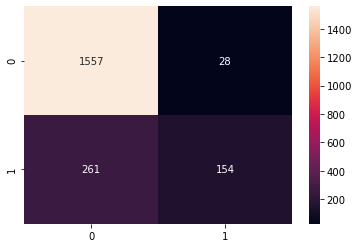

In [41]:
# Representation via confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('< ---- Confusion Matrix ---- >')
sns.heatmap(cm, annot=True ,fmt='g')

In [42]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

85.55 % of testing data was classified correctly
